## Machine Learning - Project: Face recognitions


Submitted by: [Slavik Lozver]

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC 
from PIL import Image

In [2]:
def read_image():  #loading all the data
    path = 'att_faces'
    X = []
    y = []
    for i in range(40):
        for j in range(10):
            img = Image.open(os.path.join(path,'s'+str(i+1),str(j+1)+'.pgm'))
            X.append(np.asarray(img,dtype=np.uint8).flatten())
            y.append(i)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [3]:
#-------------------------------------- SVM -----------------------------------------#
def face_rec_svm(X,y, n_comp):
    #spliting the training data and the testing data
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.20, random_state=42)  
    
    pca = PCA(n_components = n_comp, whiten=True) # reducing the dimension with the pca algorithm 
    X_trn_pca = pca.fit_transform(X_trn)
    X_tst_pca= pca.transform(X_tst)
    
    eigenfaces = pca.components_.reshape((n_comp, 112, 92))  #saving the eigenfaces
    
   
    sv = SVC(kernel='rbf',gamma = 0.0001, C=100)
    sv.fit(X_trn_pca,y_trn) # fitting the training data 

    y_pred = sv.predict(X_tst_pca)
    
    return y_pred, y_tst, X_tst, eigenfaces
    

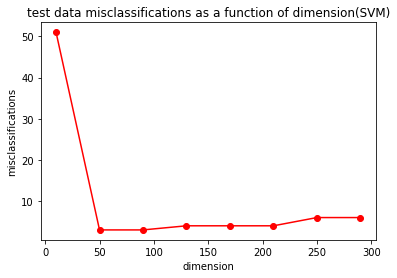

In [4]:
X,y = read_image() #reading the data

def find_best_dimension(X,y):  # to find the best dimension for the data
    max = 300
    d_arr = np.arange(10,300,40)  # diffrent dimensions to test
    miss_arr = np.zeros(len(d_arr))
    for i in range(len(d_arr)):
        y_pred, y_tst, X_tst,e_f =face_rec_svm(X,y,d_arr[i])
        miss=0
        for j in range(len(y_tst)):   # counting how mush faces was misclassified
            if (y_pred[j]!=y_tst[j]):
                miss+=1
        miss_arr[i]=miss
    
    min_ind =np.argmin(miss_arr)   #the min miss is the best
    plt.plot(d_arr, miss_arr, '-or' )  # polting the misclassification and the dimension 
    plt.title("test data misclassifications as a function of dimension(SVM)")
    plt.xlabel("dimension")
    plt.ylabel("misclassifications")
    plt.show()
    return d_arr[min_ind]
    

min_d =find_best_dimension(X,y) 


the eigen-faces: 


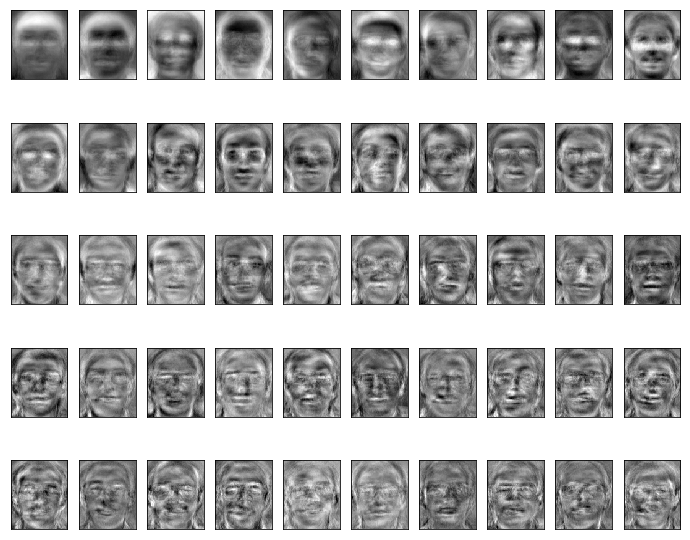

In [5]:

y_pred, y_tst, X_tst,eigenfaces = face_rec_svm(X,y,min_d)
h=112
w=92
plt.figure(figsize=(12,10))
print("the eigen-faces: ")
for i in range(len(eigenfaces)):  # ploting the eigen faces
        plt.subplot(5, 10, i + 1)
        plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())


In [6]:
#-------------------------------------- LogisticRegression -----------------------------------------#
def face_rec_log_reg(X,y,n_comp):
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.20, random_state=42)  
    
    pca = PCA(n_components = n_comp, whiten=True) # reducing the dimension with the pca algorithm 
    X_trn_pca = pca.fit_transform(X_trn)
    X_tst_pca= pca.transform(X_tst)
    
    eigenfaces = pca.components_.reshape((n_comp, 112, 92))  #saving the eigenfaces
    
    logreg= LogisticRegression()
    logreg.fit(X_trn_pca,y_trn)
    y_pred = logreg.predict(X_tst_pca)
    
    return y_pred, y_tst, X_tst, eigenfaces
    

In [7]:
def find_best_dimension_log(X,y):  # to find the best dimension for the data
    max = 300
    d_arr = np.arange(10,300,40)  # diffrent dimensions to test
    miss_arr = np.zeros(len(d_arr))
    for i in range(len(d_arr)):
        y_pred, y_tst, X_tst,e_f =face_rec_log_reg(X,y,d_arr[i])
        miss=0
        for j in range(len(y_tst)):   # counting how mush faces was misclassified
            if (y_pred[j]!=y_tst[j]):
                miss+=1
        miss_arr[i]=miss
    
    min_ind =np.argmin(miss_arr)   #the min miss is the best
    plt.plot(d_arr, miss_arr, '-or' )  # polting the misclassification and the dimension 
    plt.title("test data misclassifications as a function of dimension (LogisticRegression)")
    plt.xlabel("dimension")
    plt.ylabel("misclassifications")
    plt.show()
    return d_arr[min_ind]

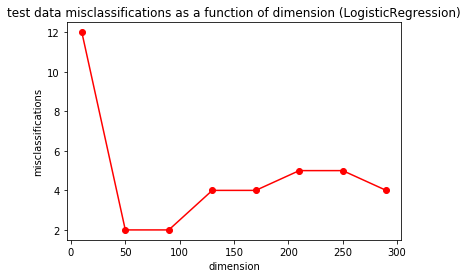

In [8]:
min_d =find_best_dimension_log(X,y) 
